# DBSCAN - Density-Based Clustering

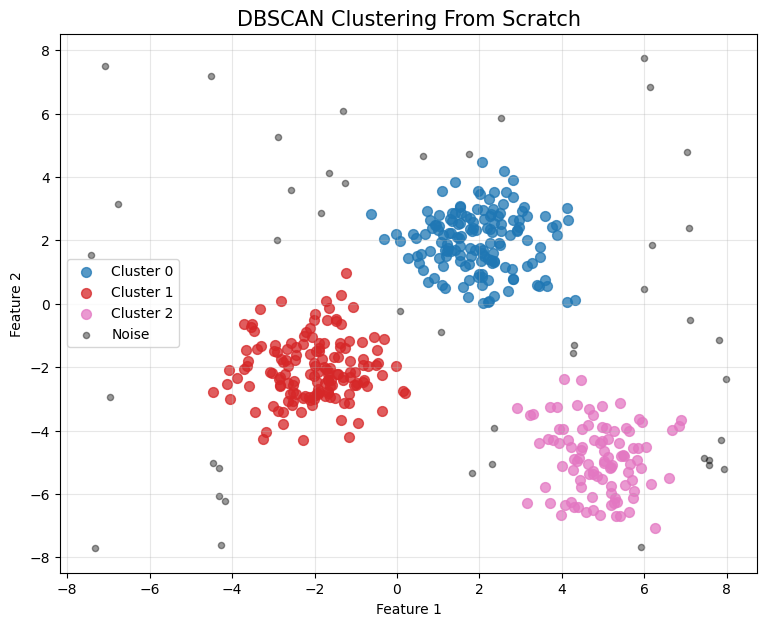

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate sample data
np.random.seed(42)

X1 = np.random.randn(150, 2) + [2, 2]
X2 = np.random.randn(150, 2) + [-2, -2]
X3 = np.random.randn(100, 2) + [5, -5]
noise = np.random.uniform(-8, 8, (40, 2))

X = np.vstack((X1, X2, X3, noise))

# 2. DBSCAN Implementation
class DBSCAN:
    def __init__(self, eps=0.8, min_pts=5):
        self.eps = eps
        self.min_pts = min_pts

    def fit(self, X):
        n = len(X)
        self.labels = np.full(n, -1) # -1 = noise
        visited = np.zeros(n, dtype=bool)
        cluster_id = 0

        for i in range(n):
            if visited[i]:
                continue

            visited[i] = True
            neighbors = self._region_query(X, i)

            if len(neighbors) < self.min_pts:
                self.labels[i] = -1
            else:
                self._expand_cluster(X, i, neighbors, cluster_id, visited)
                cluster_id += 1

    def _region_query(self, X, idx):
        return [
            i for i in range(len(X))
            if np.linalg.norm(X[i] - X[idx]) <= self.eps
        ]
    
    def _expand_cluster(self, X, idx, neighbors, cluster_id, visited):
        self.labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            point = neighbors[i]

            if not visited[point]:
                visited[point] = True
                new_neighbors = self._region_query(X, point)
                if len(new_neighbors) >= self.min_pts:
                    neighbors += new_neighbors

            if self.labels[point] == -1:
                self.labels[point] = cluster_id

            i += 1

# 3. Train DBSCAN
dbscan = DBSCAN(eps=0.9, min_pts=6)
dbscan.fit(X)

labels = dbscan.labels
unique_labels = set(labels)

# 4. Visualization
plt.figure(figsize=(9,7))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(
            X[labels == label][:, 0],
            X[labels == label][:, 1],
            c="black",
            s=20,
            label="Noise",
            alpha=0.4
        )
    else:
        plt.scatter(
            X[labels == label][:, 0],
            X[labels == label][:, 1],
            color=color,
            s=50,
            label=f"Cluster {label}",
            alpha=0.75
        )

plt.title("DBSCAN Clustering From Scratch", fontsize=15)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

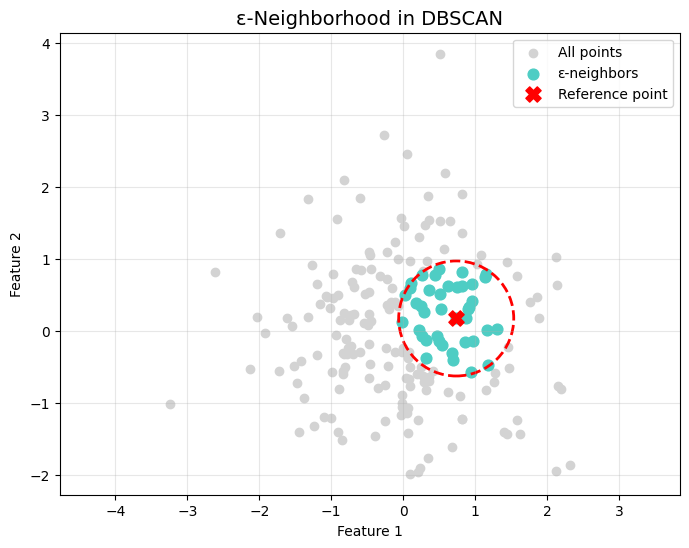

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.random.randn(200, 2)

# Pick a reference point
idx = 20
point = X[idx]

# Epsilon
eps = 0.8

# Compute distances
distances = np.linalg.norm(X - point, axis=1)
neighbors = distances <= eps

# visualization
plt.figure(figsize=(8,6))

# All points
plt.scatter(X[:,0], X[:,1], c="lightgray", label="All points")

# ε-neighbors
plt.scatter(
    X[neighbors][:,0],
    X[neighbors][:,1],
    c="#4ecdc4",
    s=60,
    label="ε-neighbors"
)

# Reference point
plt.scatter(
    point[0],
    point[1],
    c="red",
    s=120,
    marker="X",
    label="Reference point"
)

# ε-circle
circle = plt.Circle(point, eps, color="red", fill=False, linestyle="--", linewidth=2)
plt.gca().add_patch(circle)

plt.title("ε-Neighborhood in DBSCAN", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.axis("equal")
plt.show()